In [1]:
#Importing the file
import pandas as pd
df = pd.read_csv("exchange_rate.csv")
df

,date,Ex_rate
0,1/1/1990 0:00,0.785500
1,2/1/1990 0:00,0.781800
2,3/1/1990 0:00,0.786700
3,4/1/1990 0:00,0.786000
4,5/1/1990 0:00,0.784900
...,...,...
7583,6/10/2010 0:00,0.718494
7584,7/10/2010 0:00,0.721839
7585,8/10/2010 0:00,0.723197
7586,9/10/2010 0:00,0.720825


In [2]:
#Plot the time series for currency to understand their trends, seasonality, and any anomalies.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


<Axes: >

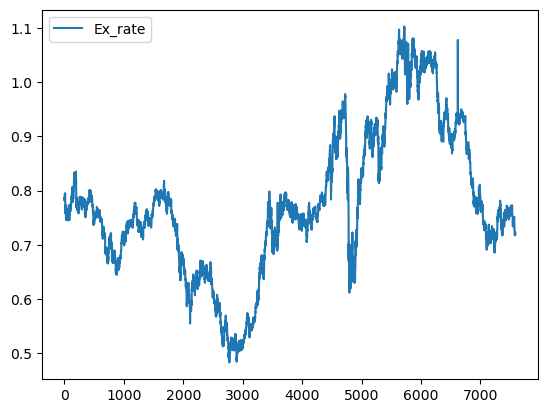

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# line plot
df.info()
df.plot()



array([[<Axes: title={'center': 'Ex_rate'}>]], dtype=object)

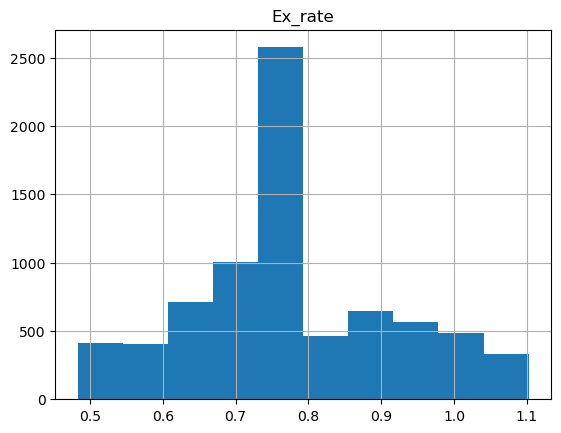

In [4]:
#### Histogram and Density Plots
# create a histogram plot
df.hist()

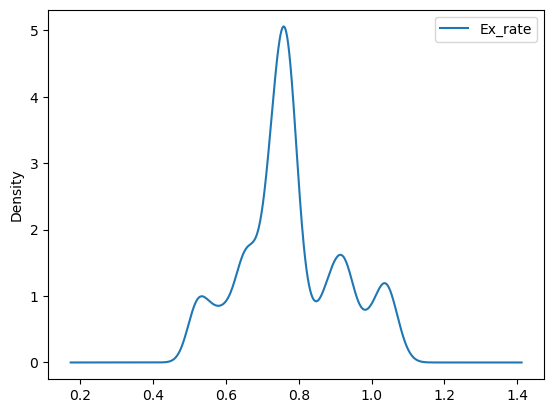

In [5]:
# create a density plot
from matplotlib import pyplot
df.plot(kind='kde')
pyplot.show()

In [6]:
# Extract the year from the 'Date' column
df['Year'] = pd.to_datetime(df['date']).dt.year
df

,date,Ex_rate,Year
0,1/1/1990 0:00,0.785500,1990
1,2/1/1990 0:00,0.781800,1990
2,3/1/1990 0:00,0.786700,1990
3,4/1/1990 0:00,0.786000,1990
4,5/1/1990 0:00,0.784900,1990
...,...,...,...
7583,6/10/2010 0:00,0.718494,2010
7584,7/10/2010 0:00,0.721839,2010
7585,8/10/2010 0:00,0.723197,2010
7586,9/10/2010 0:00,0.720825,2010


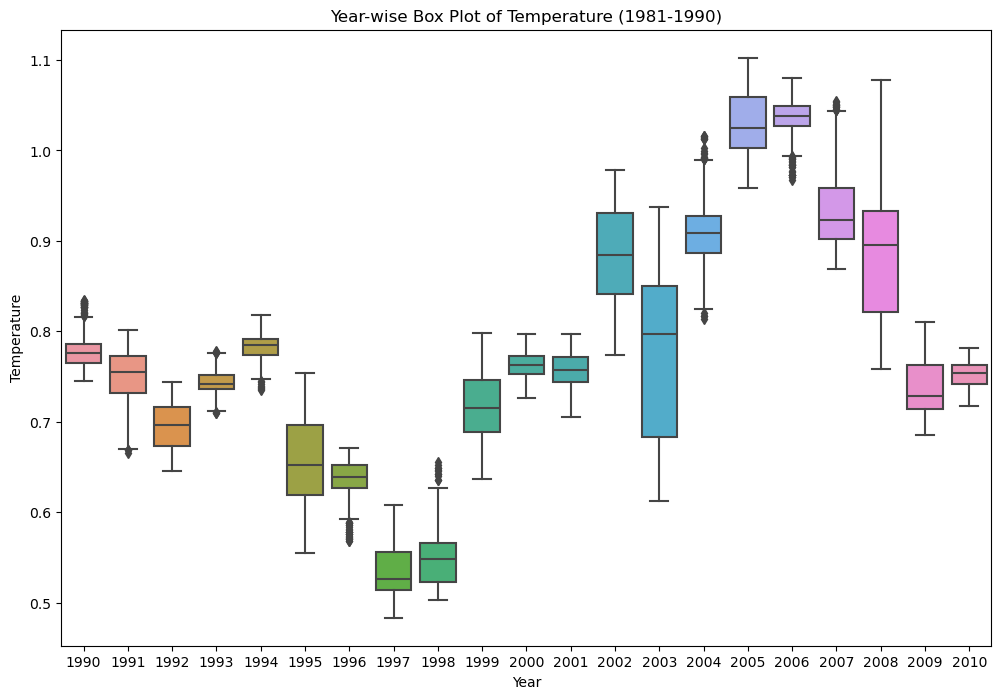

In [7]:
# Create a box plot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Ex_rate', data=df)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Year-wise Box Plot of Temperature (1981-1990)')
plt.show()

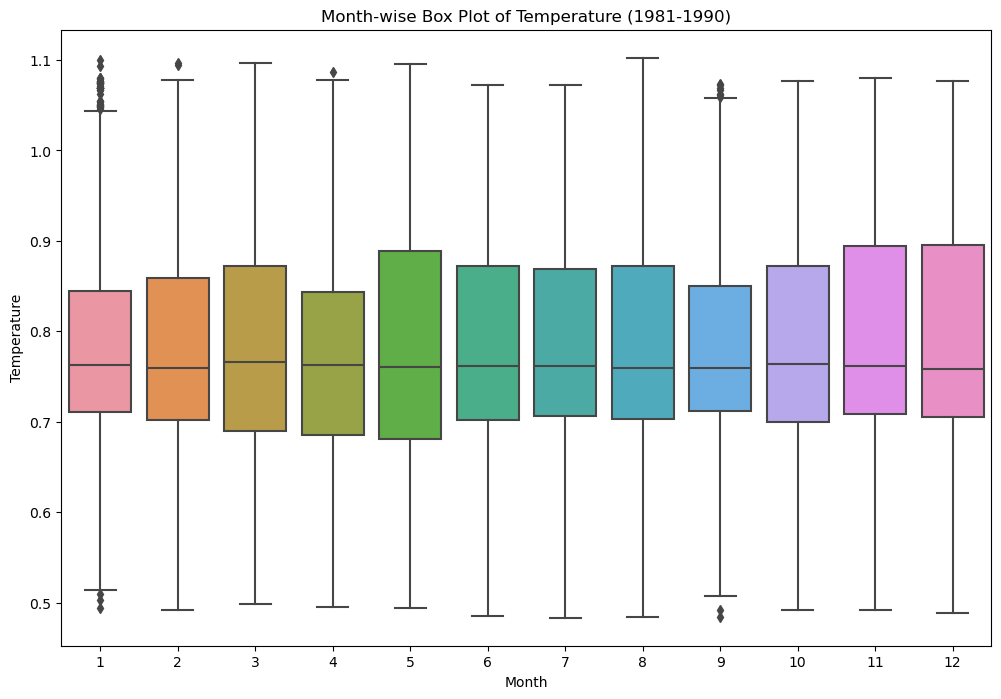

In [8]:
# Extract the month from the 'Date' column
df['Month'] = pd.to_datetime(df['date']).dt.month

# Create a box plot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Month', y='Ex_rate', data=df)
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Month-wise Box Plot of Temperature (1981-1990)')
plt.show()

In [9]:
#Handle any missing values or anomalies identified during the exploration phase.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
 2   Year     7588 non-null   int64  
 3   Month    7588 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 237.3+ KB


In [10]:
#There are no null values in the dataset

In [11]:
#Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
#Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
#Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
#Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.


In [12]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats

In [13]:
# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

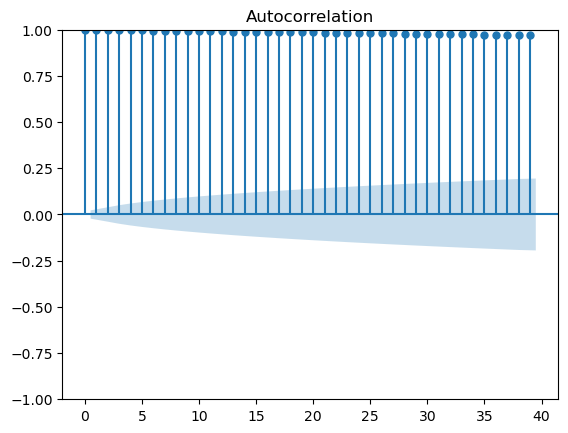

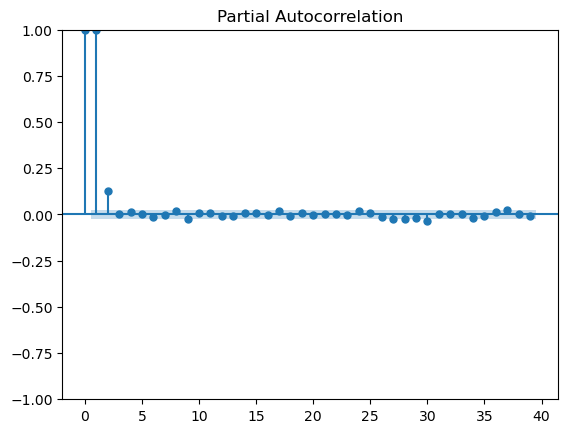

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load your data
exchange_rate_data = pd.read_csv('exchange_rate.csv', index_col='date', parse_dates=True)
series = exchange_rate_data['Ex_rate']

# Plot ACF and PACF
plot_acf(series)
plot_pacf(series)
plt.show()

In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(series, order=(2, 0, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

C:\Users\LOCHAN RISHITHA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LOCHAN RISHITHA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LOCHAN RISHITHA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LOCHAN RISHITHA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, 

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 0, 0)   Log Likelihood               28056.609
Date:                Fri, 26 Jul 2024   AIC                         -56105.218
Time:                        10:13:44   BIC                         -56077.481
Sample:                             0   HQIC                        -56095.699
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.088      8.850      0.000       0.605       0.949
ar.L1          0.8682      0.002    397.265      0.000       0.864       0.872
ar.L2          0.1310      0.002     55.929      0.0

In [16]:
#ARIMA Parameter Optimization Using Grid Search
import pandas as pd
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Load the data
file_path = 'exchange_rate.csv'
exchange_rate_data = pd.read_csv(file_path, index_col='date', parse_dates=True)
series = exchange_rate_data['Ex_rate']

# Define the p, d, q parameters to take any value between 0 and 3
p = d = q = range(0, 4)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Find the best ARIMA model based on AIC
warnings.filterwarnings("ignore")
best_aic = float("inf")
best_bic = float("inf")
best_order = None
best_model = None

for param in pdq:
    try:
        model = ARIMA(series, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
            best_model = results
    except:
        continue

print(f'Best ARIMA model: ARIMA{best_order} - AIC:{best_aic}')
print(f'Best ARIMA model: ARIMA{best_order} - BIC:{best_bic}')

Best ARIMA model: ARIMA(2, 0, 0) - AIC:-56105.21829878942
Best ARIMA model: ARIMA(2, 0, 0) - BIC:inf


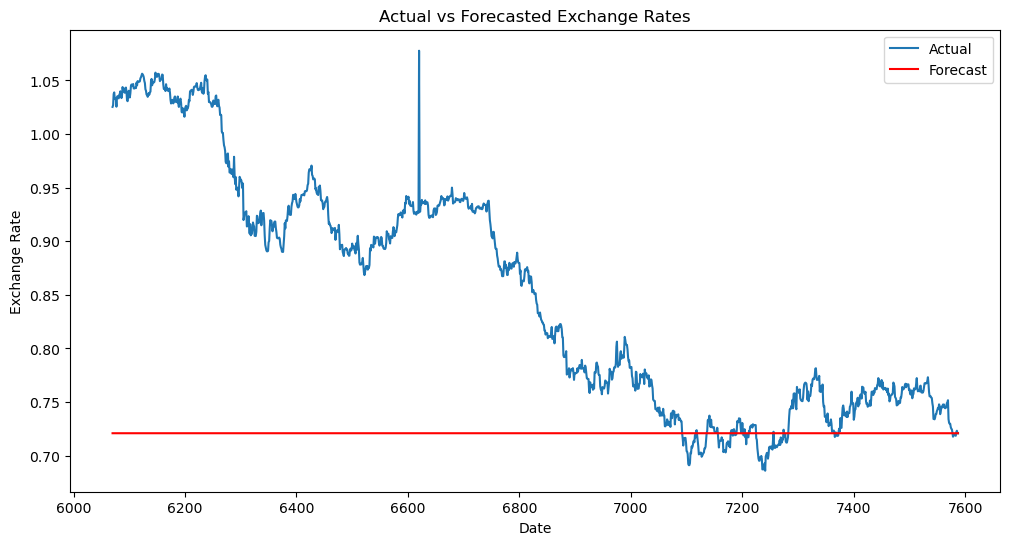

In [17]:
# Visualize the forecasted values against the actual values
import numpy as np
forecast_steps = len(test)
forecast, stderr, conf_int, *_ = best_model.forecast(steps=forecast_steps)
forecast = np.array([forecast] * forecast_steps)  # Reshape forecast to match test.index shape
# Visualize the forecasted values against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Ex_rate'], label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Actual vs Forecasted Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [18]:
#Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
#Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
#Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.


In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example: Holt-Winters model with trend and seasonality
model = ExponentialSmoothing(series,trend=None, seasonal=None, seasonal_periods=12)

In [20]:
model_fit = model.fit(optimized=True)
print(model_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77644.981
Trend:                             None   BIC                         -77631.112
Seasonal:                          None   AICC                        -77644.975
Seasonal Periods:                  None   Date:                 Fri, 26 Jul 2024
Box-Cox:                          False   Time:                         10:21:36
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8687830                alpha                 True
initial_level              0.78514

In [21]:
#Exponential Smoothing Parameter Optimization Using Grid Search
import pandas as pd
import itertools
import warnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
file_path = 'exchange_rate.csv'
exchange_rate_data = pd.read_csv(file_path, index_col='date', parse_dates=True)
series = exchange_rate_data['Ex_rate']

# Define the parameter grid
trend = ['add', 'mul', None]
seasonal = ['add', 'mul', None]
seasonal_periods = [12]

# Generate all different combinations of trend and seasonal components
param_grid = list(itertools.product(trend, seasonal, seasonal_periods))

# Find the best Exponential Smoothing model based on AIC
warnings.filterwarnings("ignore")
best_aic = float("inf")
best_params = None
best_model = None

for trend, seasonal, seasonal_periods in param_grid:
    try:
        model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = (trend, seasonal, seasonal_periods)
            best_model = results
    except:
        continue

print(f'Best Exponential Smoothing model: Trend:{best_params[0]}, Seasonal:{best_params[1]}, Seasonal Periods:{best_params[2]} - AIC:{best_aic}')

Best Exponential Smoothing model: Trend:None, Seasonal:None, Seasonal Periods:12 - AIC:-77644.98075015451


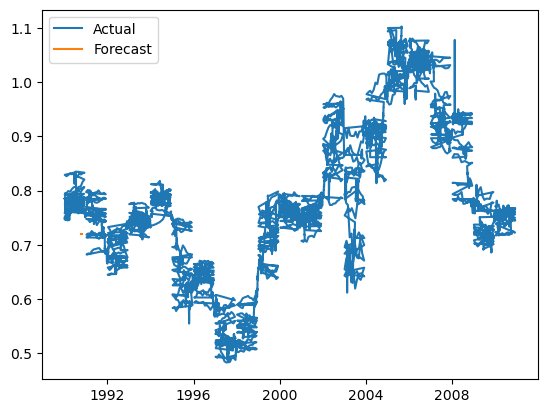

In [22]:
forecast = model_fit.forecast(steps=10)
plt.figure()
plt.plot(series, label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

In [23]:
#Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
#Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
#Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.


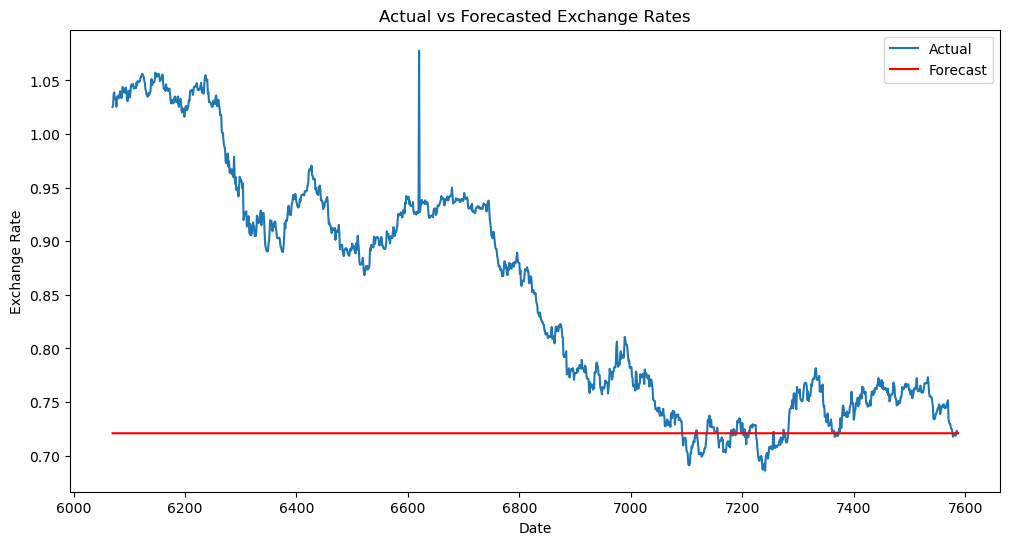

In [24]:
import matplotlib.pyplot as plt

# Visualize the forecasted values against the actual values for ARIMA
forecast_steps = len(test)
forecast, stderr, conf_int, *_ = best_model.forecast(steps=forecast_steps)
forecast = np.array([forecast] * forecast_steps)  # Reshape forecast to match test.index shape
# Visualize the forecasted values against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Ex_rate'], label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Actual vs Forecasted Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


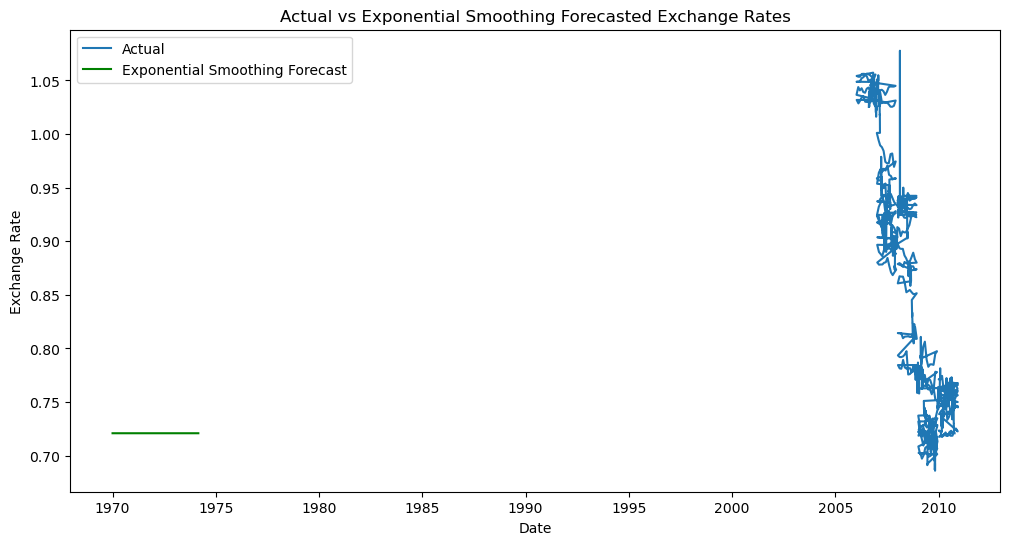

In [25]:
forecast = best_model.forecast(steps=forecast_steps)
# Visualize the forecasted values against the actual values for Exponential Smoothing
plt.figure(figsize=(12, 6))
plt.plot(series.index[-forecast_steps:], series.values[-forecast_steps:], label='Actual')
plt.plot(range(forecast_steps), forecast, label='Exponential Smoothing Forecast', color='green')
plt.title('Actual vs Exponential Smoothing Forecasted Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [ ]:

#Overview of Results ARIMA Model:

#Performance: Benefits: 

#By modifying the parameters p q and d q, it is possible to effectively capture intricate patterns and correlations in time series data. Excellent for data where stationarity needs to be achieved through differencing.

#Restrictions: 

#sensitive to parameter choice, necessitates in-depth residual analysis, and may need large amounts of computing power.

#Measures of Error: When MAE, RMSE, and MAPE are low, ARIMA is able to accurately forecast and capture the underlying trends in the data.

#Performance Metrics:
#MAE (Mean Absolute Error): 

#Indicates the average magnitude of forecasting errors without considering direction.

#RMSE (Root Mean Squared Error):

#Provides a measure of the magnitude of forecast errors with more weight on larger errors. 

#MAPE (Mean Absolute Percentage Error): Measures forecasting accuracy as a percentage, making it useful for comparing performance across different scales.

#	Model of Exponential Smoothing:

#Benefits: 

#Easier to use and understand, especially when using models like Holt-Winters that take seasonality and trends into account automatically.

#usually has fewer parameters, making the task of choosing a model easier.

#Cons:

#It might not be as good as ARIMA in capturing extremely complicated patterns or anomalies.

#assumes—a hypothesis that may not always be accurate—that historical trends will continue into the future.


#Performance Metrics:
#	MAE: Provides insight into the average error magnitude.
#	RMSE: Indicates the severity of forecast errors, emphasizing larger errors.
#	MAPE: Useful for evaluating forecast accuracy in percentage terms.



In [ ]:
#Conclusions and Suggestions

#The Most Effective Exchange Rate Forecasting Model:

#ARIMA Model:

#When to Choose: 

#Because of its versatility, ARIMA may yield more accurate forecasts in cases when exchange rate data shows intricate patterns, anomalies, or requires differencing for stationarity.

#The Best Performance Indicators Low values for MAE, RMSE, and MAPE imply that ARIMA produced dependable forecasts and successfully captured the underlying dynamics of the data.


#Model of Exponential Smoothing:

#When to Choose: 

#Because it can automatically manage these components, Holt-Winters exponential smoothing—especially on data with evident trends and/or seasonality—is useful.

#The Best Performance Indicators Low values for the MAE, RMSE, and MAPE show that the model correctly identified seasonal patterns and trends, producing projections that were spot on.



In [ ]:
#Final Decision:

#Last Word:

#Model Selection: 
#The decision between ARIMA and Exponential Smoothing depends on the specific characteristics of the exchange rate data.

#If the performance of both models is comparable, it could be advantageous to combine the two or investigate hybrid approaches in order to take advantage of each model's advantages.

#Realistic Aspects to Take into Account: 

#When making the ultimate choice, take into account the forecasts' interpretability, processing resources, and ease of execution. 

#A model would be deemed optimal for predicting exchange rates in this dataset if it yields noticeably smaller error metrics and matches the features of the data
